In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [ ]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [ ]:
df = pd.concat([df_train,df_test])

In [ ]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [ ]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [ ]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [ ]:
# df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [ ]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [ ]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [ ]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Instead of one hot encoding we will try label encoding to convert the categorical values to numerical ones.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['protocol_type', 'service', 'flag']

label_encoder = LabelEncoder()

for i in categorical_columns:
  df[i]= label_encoder.fit_transform(df[i])


In [ ]:
df.head(10)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   
5         0              1       49     1          0          0     0   
6         0              1       49     5          0          0     0   
7         0              1       49     5          0          0     0   
8         0              1       51     5          0          0     0   
9         0              1       49     5          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7         16  

### Scaling numericals values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes","protocol_type", "service", "flag", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

In [ ]:
df_preprocessed = df.copy()

In [ ]:
df_preprocessed.shape

(148517, 42)

In [ ]:
df_preprocessed.head(3)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.289855   0.9  3.558064e-07        0.0     0   
1       0.0            1.0  0.637681   0.9  1.057999e-07        0.0     0   
2       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0     0.0  0.0                0.0          0              0.0   
1               0     0.0  0.0                0.0          0              0.0   
2               0     0.0  0.0                0.0          0              0.0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0           0.0       0.0                 0.0         0.0   
1           0           0.0       0.0                 0.0         0.0   
2           0           0.0       0.0                 0.0         0.0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  \
0               0.0                  0              0               0   
1               0.0                  0              0               0   
2               0.0                  0              0               0   

      count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \
0  0.003914   0.003914          0.0              0.0          0.0   
1  0.025440   0.001957          0.0              0.0          0.0   
2  0.240705   0.011742          1.0              1.0          0.0   

   srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0              0.0           1.00           0.00                 0.0   
1              0.0           0.08           0.15                 0.0   
2              0.0           0.05           0.07                 0.0   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.588235            0.098039                    0.17   
1        1.000000            0.003922                    0.00   
2        1.000000            0.101961                    0.10   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   1.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   
1                       0.0                  0.00                       0.0   
2                       1.0                  0.00                       0.0   

     label  
0   normal  
1   normal  
2  neptune

In [ ]:
df_preprocessed_corr = df_preprocessed.copy()

In [ ]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [ ]:
df_preprocessed_corr.head(20)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0        0.0            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1        0.0            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
2        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
3        0.0            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4        0.0            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00  0.000000e+00     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
12       0.0            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07  0.000000e+00     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00  0.000000e+00     0   
15       0.0            0.5  0.550725   0.5  0.000000e+00  0.000000e+00     0   
16       0.0            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
17       0.0            0.0  0.202899   0.9  1.304382e-08  0.000000e+00     0   
18       0.0            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19       0.0            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
2                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
12               0     0.0  0.0                0.0          1   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   
15               0     0.0  0.0                0.0          0   
16               0     0.0  0.0                0.0          1   
17               0     0.0  0.0                0.0          0   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
2               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0            

### Finding importance of each feature

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_preprocessed_corr.corr()

plt.figure(figsize=(100, 100))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

In [ ]:
correlation_matrix = df_preprocessed_corr.corr()
correlation_matrix

label_correlations = correlation_matrix['label'].sort_values(ascending=False)

print(f"Correlation with label (target attribute)\n: {label_correlations}")


Correlation with label (target attribute)
: label                          1.000000
same_srv_rate                  0.708911
dst_host_srv_count             0.692577
dst_host_same_srv_rate         0.667624
logged_in                      0.664117
flag                           0.629556
protocol_type                  0.271630
srv_diff_host_rate             0.113183
num_access_files               0.035478
su_attempted                   0.021545
num_file_creations             0.017585
srv_count                      0.015006
root_shell                     0.013468
num_root                       0.011165
num_compromised                0.009900
hot                            0.009637
num_shells                     0.000259
dst_bytes                     -0.003583
is_guest_login                -0.003839
urgent                        -0.003862
src_bytes                     -0.005457
is_host_login                 -0.007835
land                          -0.008817
num_failed_logins             -0.042

### Attributes with high positive correlation with label
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* flag                           = 0.629556


### Attributes with high negative correlation with label
* count                      =    -0.524108
* srv_serror_rate            =    -0.586636
* serror_rate                =    -0.588474
* dst_host_serror_rate       =    -0.589936
* dst_host_srv_serror_rate   =    -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [ ]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# X = df_preprocessed_corr.drop('label', axis=1)
# y = df_preprocessed_corr['label']

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

### Normal and Anomalous traffic data after preprocessing

In [ ]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [ ]:
normal_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0    0.00000            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1    0.00000            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
3    0.00000            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4    0.00000            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
12   0.00000            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
16   0.00000            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
18   0.00000            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19   0.00000            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   
22   0.00000            0.5  0.347826   0.9  1.833381e-07  9.088221e-06     0   
23   0.09715            1.0  0.637681   0.9  1.065245e-07  8.015650e-08     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
12               0     0.0  0.0                0.0          1   
16               0     0.0  0.0                0.0          1   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   
22               0     0.0  0.0                0.0          1   
23               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
12              0.0           0           0.0       0.0                 0.0   
16              0.0           0           0.0       0.0                 0.0   
18              0.0           0           0.0       0.0                 0.0   
19              0.0           0           0.0       0.0                 0.0   
22              0.0           0           0.0       0.0                 0.0   
23              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
0          0.0               0.0                  0              0   
1          0.0               0.0                  0              0   
3          0.0               0.0                  0              0   
4          0.0               0.0                  0              0   
12         0.0               0.0                  0              0   
16         0.0               0.0                  0              0   
18         0.0               0.0                  0              0   
19         0.0               0.0                  0              0   
22         0.0               0.0                  0              0   
23         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
0                0  0.003914   0.003914          0.0             0.00   
1                0  0.025440   0.001957          0.0             0.00   
3                0  0.009785   0.009785          0.2             0.20   
4                0  0.058708   0.062622          0.0             0.00   
12               0  0.005871   0.013699          0.0             0.00   
16               0  0.015656   0.017613          0.0             0.11   
18               0  0.005871   0.005871          0.0             0.00   
19               0  0.017613   0.019569          0.0             0.00   
22               0  0.015656   0.019569          0.0             0.00   
23               0  0.001

In [ ]:
normal_traffic_preprocessed.shape

(77054, 42)

In [ ]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [ ]:
anomalous_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
2        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00        0.0     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07        0.0     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00        0.0     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
2                0     0.0  0.0                0.0          0   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
2               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0                 0.0   
11              0.0           0           0.0       0.0                 0.0   
13              0.0           0           0.0       0.0                 0.0   
14              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
2          0.0               0.0                  0              0   
5          0.0               0.0                  0              0   
6          0.0               0.0                  0              0   
7          0.0               0.0                  0              0   
8          0.0               0.0                  0              0   
9          0.0               0.0                  0              0   
10         0.0               0.0                  0              0   
11         0.0               0.0                  0              0   
13         0.0               0.0                  0              0   
14         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
2                0  0.240705   0.011742          1.0              1.0   
5                0  0.236791   0.037182          0.0              0.0   
6                0  0.324853   0.017613          1.0              1.0   
7                0  0.228963   0.031311          1.0              1.0   
8                0  0.528376   0.045010          1.0              1.0   
9                0  0.260274   0.015656          1.0              1.0   
10               0  0.401174   0.023483          0.0              0.0   
11               0  0.389432   0.005871          1.0              1.0   
13               0  0.003914   0.003914          0.0              0.0   
14               0  0.455969   0.001957          1.0      

In [ ]:
anomalous_traffic_preprocessed.shape

(71463, 42)

# Clustered Autoencoder

# Basic AutoEncoder model

In [ ]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [ ]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [ ]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [ ]:
x_train = train_df.drop("label",axis=1)

In [ ]:
x_train.head(5).shape

(5, 41)

In [ ]:
x_train = np.array(x_train).astype("float32")

In [ ]:

# input_dim = 41
# encoding_dim = 16
# autoencoder = create_autoencoder(input_dim, encoding_dim)
# autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

# ae_op = autoencoder.predict(x_train)
# reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
# print(reconstruction_loss)

In [ ]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_01.h5')

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_01.h5')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                672       
                                                                 
 dense_3 (Dense)             (None, 41)                697       
                                                                 
Total params: 1369 (5.35 KB)
Trainable params: 1369 (5.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


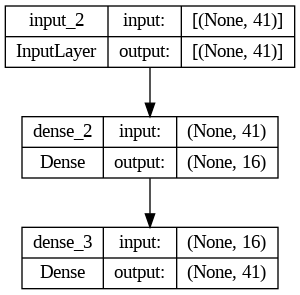

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
normal_train_output = autoencoder.predict(x_train)

  12/2096 [..............................] - ETA: 10s 

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2096/2096 [==============================] - 8s 4ms/step


In [ ]:
normal_train_output

array([[5.3901505e-03, 5.0202602e-01, 2.8216594e-01, ..., 3.6660801e-03,
        1.1459120e-02, 7.4593616e-03],
       [5.4557435e-02, 9.9218124e-01, 6.3993073e-01, ..., 1.5732537e-04,
        6.4810482e-04, 5.4995285e-04],
       [7.9256235e-05, 4.9785808e-01, 3.4592837e-01, ..., 2.1375827e-03,
        8.9238575e-03, 4.9290620e-03],
       ...,
       [8.2246428e-05, 5.0051248e-01, 3.4717134e-01, ..., 9.2110271e-04,
        1.0670557e-02, 7.9973713e-03],
       [5.0322508e-04, 5.0258905e-01, 3.4513521e-01, ..., 1.7521350e-04,
        9.7731012e-01, 9.2956465e-01],
       [4.1613754e-04, 9.9126023e-01, 1.7405978e-01, ..., 9.4554880e-06,
        3.6097327e-03, 3.2700901e-03]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [ ]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

0.00034032998

### Testing the model

In [ ]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [ ]:
normal_test.shape

(10000, 42)

In [ ]:
anomalous_test.shape

(71463, 42)

In [ ]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [ ]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [ ]:
normal_test_op = autoencoder.predict(normal_test)

 33/313 [==>...........................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [ ]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.0013048128

In [ ]:
mse_normal_test

array([0.00045225, 0.00063797, 0.00014303, ..., 0.0002716 , 0.00025008,
       0.00028495], dtype=float32)

In [ ]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.0013215435


### Find how many normal traffic data from test dataset is classified as normal

In [ ]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9336
non normal count : 664


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [ ]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 10s 5ms/step


In [ ]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.015747564

### Find how many anomalous traffic data from test dataset is classified as normal

In [ ]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 60012
non anomalous count : 11451


### Find how many normal traffic data from train dataset is classified as normal

In [ ]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65370
non normal train count : 1684



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [ ]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [ ]:
x_test = test_df.drop("label",axis=1)

In [ ]:
x_test = np.array(x_test).astype("float32")

In [ ]:
x_test_output = autoencoder.predict(x_test)

  26/2546 [..............................] - ETA: 10s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2546/2546 [==============================] - 11s 4ms/step


In [ ]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.0139746405

In [ ]:
test_pred = []
for i in mse_test:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9336   664]
 [11451 60012]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.93      0.61     10000
           1       0.99      0.84      0.91     71463

    accuracy                           0.85     81463
   macro avg       0.72      0.89      0.76     81463
weighted avg       0.92      0.85      0.87     81463



In [ ]:
len(x_train[0])

41

# Autoencoder based clustering

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim):
  input_layer = Input(shape=(input_dim,))
  encoded_1 = Dense(32, activation="relu")(input_layer)
  encoded_2 = Dense(16, activation="relu")(encoded_1)
  encoded_3 = Dense(8, activation="relu")(encoded_2)
  decoded_1 = Dense(16, activation="relu")(encoded_3)
  decoded_2 = Dense(32, activation="relu")(decoded_1)
  decoded_3 = Dense(input_dim, activation="sigmoid")(decoded_2)
  autoencoder = Model(inputs=input_layer,outputs=decoded_3)
  encoder = Model(inputs=input_layer,outputs=encoded_3)

  autoencoder.compile(optimizer='adam', loss='mse')

  return autoencoder,encoder

In [509]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder_1(input_dim):
  input_layer = Input(shape=(input_dim,))
  encoded_1 = Dense(32, activation="relu")(input_layer)
  encoded_2 = Dense(16, activation="relu")(encoded_1)
  decoded_1 = Dense(32, activation="relu")(encoded_2)
  decoded_2 = Dense(input_dim, activation="sigmoid")(decoded_1)
  autoencoder = Model(inputs=input_layer,outputs=decoded_2)
  encoder = Model(inputs=input_layer,outputs=encoded_2)

  autoencoder.compile(optimizer='adam', loss='mse')

  return autoencoder,encoder

In [ ]:
autoencoder_1,encoder_1 = create_autoencoder(41)

In [510]:
autoencoder_2,encoder_2 = create_autoencoder_1(41)

In [ ]:
x_train = x_train.astype('float32')

## Autoencoder 1 trained on normal data (Autoencoder based clustering)

In [ ]:
from keras.models import load_model

# Load the model from the file
# autoencoder_1 = load_model('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/clustered_autoencoder_01.h5')

In [ ]:
# from keras.utils import plot_model

# plot_model(autoencoder_1, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
autoencoder_1.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


420/420 [==============================] - 24s 58ms/step - loss: 0.0419 - val_loss: 0.0132
Epoch 2/50
420/420 [==============================] - 25s 59ms/step - loss: 0.0088 - val_loss: 0.0067
Epoch 3/50
420/420 [==============================] - 22s 53ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 4/50
420/420 [==============================] - 24s 58ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 5/50
420/420 [==============================] - 22s 53ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 6/50
420/420 [==============================] - 23s 55ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 7/50
420/420 [==============================] - 22s 53ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/50
420/420 [==============================] - 24s 57ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 9/50
420/420 [==============================] - 22s 52ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/50
420/420 [==============================] - 23s 55ms/step - loss: 0.0033 - val_los

In [ ]:
from keras.models import save_model

autoencoder_1.save('clustered_autoencoder_01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x_anomalous_train = anomalous_test[:61463]
x_anomalous_test = anomalous_test[61463:]

In [ ]:
X = []
X.extend(x_anomalous_train)
X.extend(x_train)

X = [list(sample) for sample in X]
X = np.array(X)

label_train = [1]*61463 + [0]*67054

In [ ]:
encoded_data_normal_train = encoder_1.predict(X)

4017/4017 [==============================] - 20s 5ms/step


In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)


# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=4)
kmeans_1.fit(encoded_data_normal_train)

In [ ]:
import pickle
with open('kmeans_1.pkl', 'wb') as f:
    pickle.dump(kmeans_1, f)

# import pickle
# with open('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/Kmeans/kmeans_1.pkl', 'rb') as f:
#   kmeans_1 = pickle.load(f)

In [ ]:
cluster_labels_normal_train = kmeans_1.predict(encoded_data_normal_train)

cluster_count_arr = [[0] * 2]*4

a=b=c=d=e=f=g=h=0
for i in range(len(cluster_labels_normal_train)):
  if label_train[i] == 0 and cluster_labels_normal_train[i] == 0:
    a+=1
  elif label_train[i] == 1 and cluster_labels_normal_train[i] == 0:
    b+=1
  elif label_train[i] == 0 and cluster_labels_normal_train[i] == 1:
    c+=1
  elif label_train[i] == 1 and cluster_labels_normal_train[i] == 1:
    d+=1
  elif label_train[i] == 0 and cluster_labels_normal_train[i] == 2:
    e+=1
  elif label_train[i] == 1 and cluster_labels_normal_train[i] == 2:
    f+=1
  elif label_train[i] == 0 and cluster_labels_normal_train[i] == 3:
    g+=1
  elif label_train[i] == 1 and cluster_labels_normal_train[i] == 3:
    h+=1

cluster_count_arr=[[a,b],[c,d],[e,f],[g,h]]

type_order_1 = []

for i in range(len(cluster_count_arr)):
  print(f"cluster {i} normal : {cluster_count_arr[i][0]}")
  print(f"cluster {i} anomalous : {cluster_count_arr[i][1]}")
  if cluster_count_arr[i][0] > cluster_count_arr[i][1]:
    print(f"NORMAL")
    type_order_1 += [0]
  else:
    print(f"ANOMALOUS")
    type_order_1 += [1]

cluster 0 normal : 47373
cluster 0 anomalous : 2687
NORMAL
cluster 1 normal : 402
cluster 1 anomalous : 36344
ANOMALOUS
cluster 2 normal : 3170
cluster 2 anomalous : 14018
ANOMALOUS
cluster 3 normal : 16109
cluster 3 anomalous : 8414
NORMAL


In [ ]:
cluster_count_arr

[[47373, 2687], [402, 36344], [3170, 14018], [16109, 8414]]

In [ ]:
a,b,c,d,e,f,g,h

(47373, 2687, 402, 36344, 3170, 14018, 16109, 8414)

In [ ]:
encoded_data_normal_test = encoder_1.predict(normal_test)

cluster_labels_normal_test = kmeans_1.predict(encoded_data_normal_test)

type_1 = 0

cluster_0_indices_normal_test = np.where(cluster_labels_normal_test == 0)[0]
cluster_1_indices_normal_test = np.where(cluster_labels_normal_test == 1)[0]
cluster_2_indices_normal_test = np.where(cluster_labels_normal_test == 2)[0]
cluster_3_indices_normal_test = np.where(cluster_labels_normal_test == 3)[0]

cluster_indices_normal_test_arr = []
cluster_indices_normal_test_arr += [len(cluster_0_indices_normal_test)]
cluster_indices_normal_test_arr += [len(cluster_1_indices_normal_test)]
cluster_indices_normal_test_arr += [len(cluster_2_indices_normal_test)]
cluster_indices_normal_test_arr += [len(cluster_3_indices_normal_test)]


tn_1 = 0
fp_1 = 0

for i in range(len(cluster_indices_normal_test_arr)):
  print(cluster_indices_normal_test_arr[i])
  if type_order_1[i] == type_1:
    tn_1 += cluster_indices_normal_test_arr[i]
  else:
    fp_1 += cluster_indices_normal_test_arr[i]

 26/313 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step
7543
48
96
2313


In [ ]:
encoded_data_anomalous_test = encoder_1.predict(x_anomalous_test)

cluster_labels_anomalous_test = kmeans_1.predict(encoded_data_anomalous_test)

type_1 = 1

cluster_0_indices_anomalous_test = np.where(cluster_labels_anomalous_test == 0)[0]
cluster_1_indices_anomalous_test = np.where(cluster_labels_anomalous_test == 1)[0]
cluster_2_indices_anomalous_test = np.where(cluster_labels_anomalous_test == 2)[0]
cluster_3_indices_anomalous_test = np.where(cluster_labels_anomalous_test == 3)[0]

cluster_indices_anomalous_test_arr = []
cluster_indices_anomalous_test_arr.append(len(cluster_0_indices_anomalous_test))
cluster_indices_anomalous_test_arr.append(len(cluster_1_indices_anomalous_test))
cluster_indices_anomalous_test_arr.append(len(cluster_2_indices_anomalous_test))
cluster_indices_anomalous_test_arr.append(len(cluster_3_indices_anomalous_test))

tp_1 = 0
fn_1 = 0

for i in range(len(cluster_indices_anomalous_test_arr)):
  print(cluster_indices_anomalous_test_arr[i])
  if type_order_1[i] == type_1:
    tp_1 += cluster_indices_anomalous_test_arr[i]
  else:
    fn_1 += cluster_indices_anomalous_test_arr[i]

 24/313 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step
1788
1943
4080
2189


In [ ]:
print(tp_1)
print(tn_1)
print(fp_1)
print(fn_1)
val = (tp_1 + tn_1) / (tp_1 + tn_1 + fp_1 + fn_1)
print(f"average = {val}")

6023
9856
144
3977
average = 0.79395


In [ ]:
import numpy as np

TP = tp_1
TN = tn_1
FP = fp_1
FN = fn_1
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

Confusion Matrix:
[[9856  144]
 [3977 6023]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83     10000
         1.0       0.98      0.60      0.75     10000

    accuracy                           0.79     20000
   macro avg       0.84      0.79      0.79     20000
weighted avg       0.84      0.79      0.79     20000



In [ ]:
import numpy as np

TP = 7520
TN = 9527
FP = 473
FN = 2850
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

Confusion Matrix:
[[9527  473]
 [2850 7520]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85     10000
         1.0       0.94      0.73      0.82     10370

    accuracy                           0.84     20370
   macro avg       0.86      0.84      0.84     20370
weighted avg       0.86      0.84      0.83     20370



In [ ]:
# prinnnt("hi")

# Autoencoder 2 trained on normal data (Autoencoder based clustering)

In [511]:
autoencoder_2.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/50
  1/420 [..............................] - ETA: 35s - loss: 0.2297

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


420/420 [==============================] - 18s 44ms/step - loss: 0.0391 - val_loss: 0.0076
Epoch 2/50
420/420 [==============================] - 19s 44ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 3/50
420/420 [==============================] - 31s 75ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/50
420/420 [==============================] - 18s 43ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/50
420/420 [==============================] - 19s 45ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 6/50
420/420 [==============================] - 19s 45ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
420/420 [==============================] - 19s 45ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/50
420/420 [==============================] - 19s 45ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
420/420 [==============================] - 20s 46ms/step - loss: 9.2665e-04 - val_loss: 9.2508e-04
Epoch 10/50
420/420 [==============================] - 18s 43ms/step - loss: 8.4150e-

In [512]:
from keras.models import save_model

autoencoder_2.save('clustered_autoencoder_02.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from keras.models import load_model

# # Load the model from the file
# autoencoder_2 = load_model('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/clustered_autoencoder_02.h5')

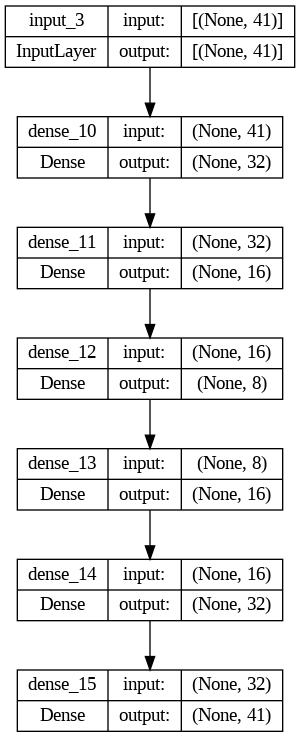

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder_2, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [513]:
encoded_data_normal_train_2 = encoder_2.predict(X)

4017/4017 [==============================] - 15s 4ms/step


In [514]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=4)
kmeans_2.fit(encoded_data_normal_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [520]:
import pickle
with open('kmeans_2.pkl', 'wb') as f:
    pickle.dump(kmeans_2, f)

# import pickle
# with open('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/Kmeans/kmeans_2.pkl', 'rb') as f:
#   kmeans_2 = pickle.load(f)

In [515]:
cluster_labels_normal_train_2 = kmeans_2.predict(encoded_data_normal_train_2)

cluster_count_arr = [[0] * 2]*4

a=b=c=d=e=f=g=h=0
for i in range(len(cluster_labels_normal_train)):
  if label_train[i] == 0 and cluster_labels_normal_train_2[i] == 0:
    a+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_2[i] == 0:
    b+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_2[i] == 1:
    c+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_2[i] == 1:
    d+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_2[i] == 2:
    e+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_2[i] == 2:
    f+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_2[i] == 3:
    g+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_2[i] == 3:
    h+=1

cluster_count_arr=[[a,b],[c,d],[e,f],[g,h]]

type_order_2 = []

for i in range(len(cluster_count_arr)):
  print(f"cluster {i} normal : {cluster_count_arr[i][0]}")
  print(f"cluster {i} anomalous : {cluster_count_arr[i][1]}")
  if cluster_count_arr[i][0] > cluster_count_arr[i][1]:
    print(f"NORMAL")
    type_order_2 += [0]
  else:
    print(f"ANOMALOUS")
    type_order_2 += [1]

cluster 0 normal : 554
cluster 0 anomalous : 35359
ANOMALOUS
cluster 1 normal : 16994
cluster 1 anomalous : 10972
NORMAL
cluster 2 normal : 46584
cluster 2 anomalous : 1888
NORMAL
cluster 3 normal : 2922
cluster 3 anomalous : 13244
ANOMALOUS


In [516]:
encoded_data_anomalous_test_2 = encoder_2.predict(x_anomalous_test)

cluster_labels_anomalous_test_2 = kmeans_2.predict(encoded_data_anomalous_test_2)

type_2 = 1

cluster_0_indices_anomalous_test_2 = np.where(cluster_labels_anomalous_test_2 == 0)[0]
cluster_1_indices_anomalous_test_2 = np.where(cluster_labels_anomalous_test_2 == 1)[0]
cluster_2_indices_anomalous_test_2 = np.where(cluster_labels_anomalous_test_2 == 2)[0]
cluster_3_indices_anomalous_test_2 = np.where(cluster_labels_anomalous_test_2 == 3)[0]


cluster_indices_anomalous_test_arr_2 = []
cluster_indices_anomalous_test_arr_2.append(len(cluster_0_indices_anomalous_test_2))
cluster_indices_anomalous_test_arr_2.append(len(cluster_1_indices_anomalous_test_2))
cluster_indices_anomalous_test_arr_2.append(len(cluster_2_indices_anomalous_test_2))
cluster_indices_anomalous_test_arr_2.append(len(cluster_3_indices_anomalous_test_2))

tp_2 = 0
fn_2 = 0

for i in range(len(cluster_indices_anomalous_test_arr_2)):
  print(cluster_indices_anomalous_test_arr_2[i])
  if type_order_2[i] == type_2:
    tp_2 += cluster_indices_anomalous_test_arr_2[i]
  else:
    fn_2 += cluster_indices_anomalous_test_arr_2[i]

 23/313 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step
1791
2620
1786
3803


In [ ]:
(1767 + 4159) / (1767 + 4159 + 2999 + 1075)

0.5926

In [517]:
encoded_data_normal_test_2 = encoder_2.predict(normal_test)

cluster_labels_normal_test_2 = kmeans_2.predict(encoded_data_normal_test_2)

type_2 = 0

cluster_0_indices_normal_test_2 = np.where(cluster_labels_normal_test_2 == 0)[0]
cluster_1_indices_normal_test_2 = np.where(cluster_labels_normal_test_2 == 1)[0]
cluster_2_indices_normal_test_2 = np.where(cluster_labels_normal_test_2 == 2)[0]
cluster_3_indices_normal_test_2 = np.where(cluster_labels_normal_test_2 == 3)[0]

cluster_indices_normal_test_arr_2 = []
cluster_indices_normal_test_arr_2 += [len(cluster_0_indices_normal_test_2)]
cluster_indices_normal_test_arr_2 += [len(cluster_1_indices_normal_test_2)]
cluster_indices_normal_test_arr_2 += [len(cluster_2_indices_normal_test_2)]
cluster_indices_normal_test_arr_2 += [len(cluster_3_indices_normal_test_2)]

tn_2 = 0
fp_2 = 0

for i in range(len(cluster_indices_normal_test_arr_2)):
  print(cluster_indices_normal_test_arr_2[i])
  if type_order_2[i] == type_2:
    tn_2 += cluster_indices_normal_test_arr_2[i]
  else:
    fp_2 += cluster_indices_normal_test_arr_2[i]

 19/313 [>.............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step
15
2393
7498
94


In [ ]:
(8037 + 1858) / (8037 + 1858 + 13 + 92)

0.9895

In [518]:
print(tp_2)
print(tn_2)
print(fp_2)
print(fn_2)
val = (tp_2 + tn_2) / (tp_2 + tn_2 + fp_2 + fn_2)
print(f"average = {val}")

5594
9891
109
4406
average = 0.77425


In [519]:
import numpy as np

TP = tp_2
TN = tn_2
FP = fp_2
FN = fn_2
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

Confusion Matrix:
[[9891  109]
 [4406 5594]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81     10000
         1.0       0.98      0.56      0.71     10000

    accuracy                           0.77     20000
   macro avg       0.84      0.77      0.76     20000
weighted avg       0.84      0.77      0.76     20000



In [521]:
import numpy as np

TP = 5685
TN = 9905
FP = 95
FN = 4315
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

Confusion Matrix:
[[9905   95]
 [4315 5685]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82     10000
         1.0       0.98      0.57      0.72     10000

    accuracy                           0.78     20000
   macro avg       0.84      0.78      0.77     20000
weighted avg       0.84      0.78      0.77     20000



In [ ]:
# @title
# prinnnt("hi")

In [ ]:
# @title


In [ ]:
# @title


In [ ]:
# @title
autoencoder_3,encoder_3 = create_autoencoder(41)

In [ ]:
# @title
tf.config.run_functions_eagerly(True)

In [ ]:
# @title
# autoencoder_3.fit(X,X, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

In [ ]:
# @title
# from keras.models import save_model

# autoencoder_3.save('clustered_autoencoder_02.h5')

In [ ]:
# @title
from keras.models import load_model

# Load the model from the file
autoencoder_3 = load_model('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/clustered_autoencoder_02.h5')


In [ ]:
# @title
encoded_data_train_3 = encoder_3.predict(X)

In [ ]:
# @title
from sklearn.cluster import KMeans

# kmeans_3 = KMeans(n_clusters=4)
# kmeans_3.fit(encoded_data_train_3)

In [ ]:
# @title
# import pickle
# with open('kmeans_3.pkl', 'wb') as f:
#     pickle.dump(kmeans_3, f)

import pickle
with open('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/Kmeans/kmeans_3.pkl', 'rb') as f:
    kmeans_3 = pickle.load(f)

In [ ]:
# @title
cluster_labels_train_3 = kmeans_3.predict(encoded_data_train_3)

cluster_count_arr = [[0] * 2]*4

a=b=c=d=e=f=g=h=0
for i in range(len(cluster_labels_normal_train)):
  if label_train[i] == 0 and cluster_labels_train_3[i] == 0:
    a+=1
  elif label_train[i] == 1 and cluster_labels_train_3[i] == 0:
    b+=1
  elif label_train[i] == 0 and cluster_labels_train_3[i] == 1:
    c+=1
  elif label_train[i] == 1 and cluster_labels_train_3[i] == 1:
    d+=1
  elif label_train[i] == 0 and cluster_labels_train_3[i] == 2:
    e+=1
  elif label_train[i] == 1 and cluster_labels_train_3[i] == 2:
    f+=1
  elif label_train[i] == 0 and cluster_labels_train_3[i] == 3:
    g+=1
  elif label_train[i] == 1 and cluster_labels_train_3[i] == 3:
    h+=1

cluster_count_arr=[[a,b],[c,d],[e,f],[g,h]]

type_order_3 = []

for i in range(len(cluster_count_arr)):
  print(f"cluster {i} normal : {cluster_count_arr[i][0]}")
  print(f"cluster {i} anomalous : {cluster_count_arr[i][1]}")
  if cluster_count_arr[i][0] > cluster_count_arr[i][1]:
    print(f"NORMAL")
    type_order_3 += [0]
  else:
    print(f"ANOMALOUS")
    type_order_3 += [1]

In [ ]:
# @title
cluster_labels_train_3

In [ ]:
# @title
encoded_data_anomalous_test_3 = encoder_3.predict(x_anomalous_test)

cluster_labels_anomalous_test_3 = kmeans_3.predict(encoded_data_anomalous_test_3)

type_3 = 1

cluster_0_indices_anomalous_test_3 = np.where(cluster_labels_anomalous_test_3 == 0)[0]
cluster_1_indices_anomalous_test_3 = np.where(cluster_labels_anomalous_test_3 == 1)[0]
cluster_2_indices_anomalous_test_3 = np.where(cluster_labels_anomalous_test_3 == 2)[0]
cluster_3_indices_anomalous_test_3 = np.where(cluster_labels_anomalous_test_3 == 3)[0]

cluster_indices_anomalous_test_arr_3 = []
cluster_indices_anomalous_test_arr_3 += [len(cluster_0_indices_anomalous_test_3)]
cluster_indices_anomalous_test_arr_3 += [len(cluster_1_indices_anomalous_test_3)]
cluster_indices_anomalous_test_arr_3 += [len(cluster_2_indices_anomalous_test_3)]
cluster_indices_anomalous_test_arr_3 += [len(cluster_3_indices_anomalous_test_3)]

tp_3 = 0
fn_3 = 0

for i in range(len(cluster_indices_anomalous_test_arr_3)):
  print(cluster_indices_anomalous_test_arr_3[i])
  if type_order_3[i] == type_3:
    tp_3 += cluster_indices_anomalous_test_arr_3[i]
  else:
    fn_3 += cluster_indices_anomalous_test_arr_3[i]

In [ ]:
# @title
encoded_data_normal_test_3 = encoder_3.predict(normal_test)

cluster_labels_normal_test_3 = kmeans_3.predict(encoded_data_normal_test_3)

type_3 = 0

cluster_0_indices_normal_test_3 = np.where(cluster_labels_normal_test_3 == 0)[0]
cluster_1_indices_normal_test_3 = np.where(cluster_labels_normal_test_3 == 1)[0]
cluster_2_indices_normal_test_3 = np.where(cluster_labels_normal_test_3 == 2)[0]
cluster_3_indices_normal_test_3 = np.where(cluster_labels_normal_test_3 == 3)[0]


cluster_indices_normal_test_arr_3 = []
cluster_indices_normal_test_arr_3 += [len(cluster_0_indices_normal_test_3)]
cluster_indices_normal_test_arr_3 += [len(cluster_1_indices_normal_test_3)]
cluster_indices_normal_test_arr_3 += [len(cluster_2_indices_normal_test_3)]
cluster_indices_normal_test_arr_3 += [len(cluster_3_indices_normal_test_3)]

tn_3 = 0
fp_3 = 0

for i in range(len(cluster_indices_normal_test_arr_3)):
  print(cluster_indices_normal_test_arr_3[i])
  if type_order_3[i] == type_3:
    tn_3 += cluster_indices_normal_test_arr_3[i]
  else:
    fp_3 += cluster_indices_normal_test_arr_3[i]

In [ ]:
# @title
print(tp_3)
print(tn_3)
print(fp_3)
print(fn_3)
val = (tp_3 + tn_3) / (tp_3 + tn_3 + fp_3 + fn_3)
print(f"average = {val}")

In [ ]:
# @title
import numpy as np

TP = 57685
TN = 9770
FP = 230
FN = 13778
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

## lets try the same for number of clusters = 6

In [ ]:
# @title
from keras.models import load_model

# Load the model from the file
autoencoder_1 = load_model('/content/drive/MyDrive/Colab Notebooks/models/clustered_autoencoder/clustered_autoencoder_01.h5')

In [ ]:
# @title
encoded_data_normal_train_4 = encoder_1.predict(X)

In [ ]:
# @title
from sklearn.cluster import KMeans

kmeans_4 = KMeans(n_clusters=6)
kmeans_4.fit(encoded_data_normal_train_4)

In [ ]:
# @title
cluster_labels_normal_train_4 = kmeans_4.predict(encoded_data_normal_train_4)

cluster_count_arr_4 = [[0] * 2]*4

a=b=c=d=e=f=g=h=i=j=k=l=0
for i in range(len(cluster_labels_normal_train_4)):
  if label_train[i] == 0 and cluster_labels_normal_train_4[i] == 0:
    a+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_4[i] == 0:
    b+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_4[i] == 1:
    c+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_4[i] == 1:
    d+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_4[i] == 2:
    e+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_4[i] == 2:
    f+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_4[i] == 3:
    g+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_4[i] == 3:
    h+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_4[i] == 4:
    i+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_4[i] == 4:
    j+=1
  elif label_train[i] == 0 and cluster_labels_normal_train_4[i] == 5:
    k+=1
  elif label_train[i] == 1 and cluster_labels_normal_train_4[i] == 5:
    l+=1

cluster_count_arr_4=[[a,b],[c,d],[e,f],[g,h],[i,j],[k,l]]

type_order_4 = []

for i in range(len(cluster_count_arr_4)):
  print(f"cluster {i} normal : {cluster_count_arr_4[i][0]}")
  print(f"cluster {i} anomalous : {cluster_count_arr_4[i][1]}")
  if cluster_count_arr_4[i][0] > cluster_count_arr_4[i][1]:
    print(f"NORMAL")
    type_order_4 += [0]
  else:
    print(f"ANOMALOUS")
    type_order_4 += [1]

In [ ]:
# @title
encoded_data_anomalous_test_4 = encoder_1.predict(x_anomalous_test)

cluster_labels_anomalous_test_4 = kmeans_4.predict(encoded_data_anomalous_test_3)

type_4 = 1

cluster_0_indices_anomalous_test_4 = np.where(cluster_labels_anomalous_test_4 == 0)[0]
cluster_1_indices_anomalous_test_4 = np.where(cluster_labels_anomalous_test_4 == 1)[0]
cluster_2_indices_anomalous_test_4 = np.where(cluster_labels_anomalous_test_4 == 2)[0]
cluster_3_indices_anomalous_test_4 = np.where(cluster_labels_anomalous_test_4 == 3)[0]
cluster_4_indices_anomalous_test_4 = np.where(cluster_labels_anomalous_test_4 == 4)[0]
cluster_5_indices_anomalous_test_4 = np.where(cluster_labels_anomalous_test_4 == 5)[0]

cluster_indices_anomalous_test_arr_4 = []
cluster_indices_anomalous_test_arr_4 += [len(cluster_0_indices_anomalous_test_4)]
cluster_indices_anomalous_test_arr_4 += [len(cluster_1_indices_anomalous_test_4)]
cluster_indices_anomalous_test_arr_4 += [len(cluster_2_indices_anomalous_test_4)]
cluster_indices_anomalous_test_arr_4 += [len(cluster_3_indices_anomalous_test_4)]
cluster_indices_anomalous_test_arr_4 += [len(cluster_4_indices_anomalous_test_4)]
cluster_indices_anomalous_test_arr_4 += [len(cluster_5_indices_anomalous_test_4)]

tp_4 = 0
fn_4 = 0

for i in range(len(cluster_indices_anomalous_test_arr_4)):
  print(cluster_indices_anomalous_test_arr_4[i])
  if type_order_4[i] == type_4:
    tp_4 += cluster_indices_anomalous_test_arr_4[i]
  else:
    fn_4 += cluster_indices_anomalous_test_arr_4[i]

In [ ]:
# @title
encoded_data_normal_test_4 = encoder_1.predict(normal_test)

cluster_labels_normal_test_4 = kmeans_4.predict(encoded_data_normal_test_4)

type_4 = 0

cluster_0_indices_normal_test_4 = np.where(cluster_labels_normal_test_4 == 0)[0]
cluster_1_indices_normal_test_4 = np.where(cluster_labels_normal_test_4 == 1)[0]
cluster_2_indices_normal_test_4 = np.where(cluster_labels_normal_test_4 == 2)[0]
cluster_3_indices_normal_test_4 = np.where(cluster_labels_normal_test_4 == 3)[0]
cluster_4_indices_normal_test_4 = np.where(cluster_labels_normal_test_4 == 4)[0]
cluster_5_indices_normal_test_4 = np.where(cluster_labels_normal_test_4 == 5)[0]


cluster_indices_normal_test_arr_4 = []
cluster_indices_normal_test_arr_4 += [len(cluster_0_indices_normal_test_4)]
cluster_indices_normal_test_arr_4 += [len(cluster_1_indices_normal_test_4)]
cluster_indices_normal_test_arr_4 += [len(cluster_2_indices_normal_test_4)]
cluster_indices_normal_test_arr_4 += [len(cluster_3_indices_normal_test_4)]
cluster_indices_normal_test_arr_4 += [len(cluster_4_indices_normal_test_4)]
cluster_indices_normal_test_arr_4 += [len(cluster_5_indices_normal_test_4)]

tn_4 = 0
fp_4 = 0

for i in range(len(cluster_indices_normal_test_arr_4)):
  print(cluster_indices_normal_test_arr_4[i])
  if type_order_4[i] == type_4:
    tn_4 += cluster_indices_normal_test_arr_4[i]
  else:
    fp_4 += cluster_indices_normal_test_arr_4[i]

In [ ]:
# @title
print(tp_3)
print(tn_3)
print(fp_3)
print(fn_3)
val = (tp_3 + tn_3) / (tp_3 + tn_3 + fp_3 + fn_3)
print(f"average = {val}")

In [ ]:
# @title
import numpy as np

TP = 57685
TN = 9770
FP = 230
FN = 13778
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

# anomaly detection using distance metric

In [522]:
len(x_train)

67054

In [523]:
len(x_anomalous_train)

61463

In [524]:
len(normal_test)

10000

In [525]:
len(x_anomalous_test)

10000

In [526]:
len(X)

128517

In [527]:
import numpy as np

combined_normal = np.concatenate((x_train, normal_test), axis=0)

num_samples = len(combined_normal)
num_train = num_samples // 2

dist_normal_train = combined_normal[:num_train]
dist_normal_test = combined_normal[num_train:]

num_samples = len(combined_normal)
num_train = num_samples // 2

dist_normal_train = combined_normal[:num_train]
dist_normal_test = combined_normal[num_train:]

dist_anomalous_train = anomalous_test[:len(anomalous_test)//2]
dist_anomalous_test = anomalous_test[len(anomalous_test)//2:]

In [528]:
print(len(dist_anomalous_train))
print(len(dist_anomalous_test))
print(len(dist_normal_train))
print(len(dist_normal_test))

35731
35732
38527
38527


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


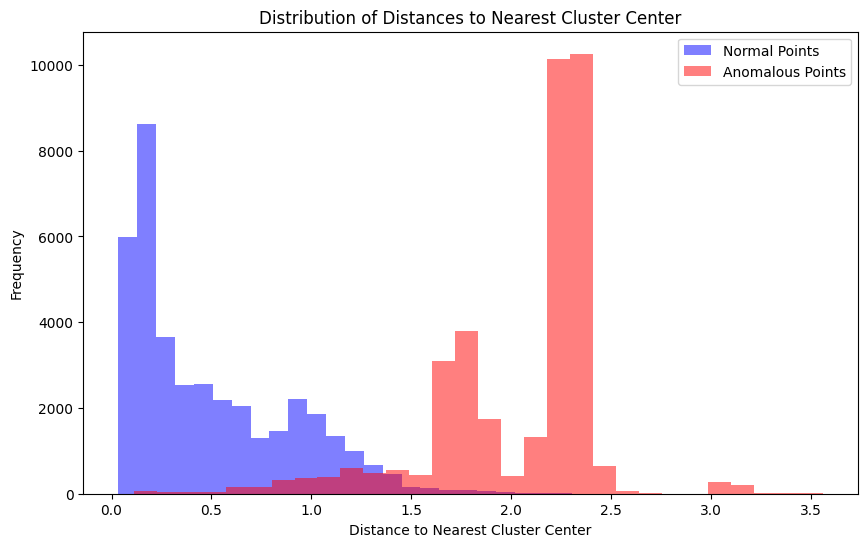

In [529]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


kmeans_01 = KMeans(n_clusters=6, random_state=42)
kmeans_01.fit(dist_normal_train)
cluster_centers = kmeans_01.cluster_centers_


normal_cluster_labels = kmeans_01.predict(dist_normal_train)
anomalous_cluster_labels = kmeans_01.predict(dist_anomalous_train)


normal_distances = pairwise_distances(dist_normal_train, cluster_centers, metric='euclidean')
anomalous_distances = pairwise_distances(dist_anomalous_train, cluster_centers, metric='euclidean')


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(normal_distances.min(axis=1), bins=30, alpha=0.5, color='blue', label='Normal Points')
plt.hist(anomalous_distances.min(axis=1), bins=30, alpha=0.5, color='red', label='Anomalous Points')
plt.xlabel('Distance to Nearest Cluster Center')
plt.ylabel('Frequency')
plt.title('Distribution of Distances to Nearest Cluster Center')
plt.legend()
plt.show()

In [530]:
cluster_points_normal_arr = []
for i in range(6):
    cluster_points_normal_arr.append(dist_normal_train[normal_cluster_labels == i])

from sklearn.metrics import pairwise_distances

normal_distances = []
cluster_distances_normal_arr = []
for i in range(6):
    cluster_center = kmeans_01.cluster_centers_[i]
    cluster_points = cluster_points_normal_arr[i]
    distances = pairwise_distances(cluster_points, [cluster_center])
    cluster_distances_normal_arr.append(distances)
    normal_distances.extend(distances)

In [531]:
cluster_points_anomalous_arr = []
cluster_pred = kmeans_01.predict(dist_anomalous_train)
cluster_points_anomalous_arr = []
for i in range(6):
  cluster_points_anomalous_arr.append(dist_anomalous_train[anomalous_cluster_labels == i ])


from sklearn.metrics import pairwise_distances

anomalous_distances = []
cluster_distances_anomalous_arr = []
for i in range(6):
  cluster_center = kmeans_01.cluster_centers_[i]
  cluster_points = cluster_points_anomalous_arr[i]
  distances = pairwise_distances(cluster_points, [cluster_center])
  cluster_distances_anomalous_arr.append(distances)
  anomalous_distances.extend(distances)

In [532]:
normal_distances = [item[0] for item in normal_distances]
anomalous_distances = [item[0] for item in anomalous_distances]

In [533]:
cluster_distances_normal_list = [[float(item[0]) for item in arr] for arr in cluster_distances_normal_arr]
cluster_distances_anomalous_list = [[float(item[0]) for item in arr] for arr in cluster_distances_anomalous_arr]

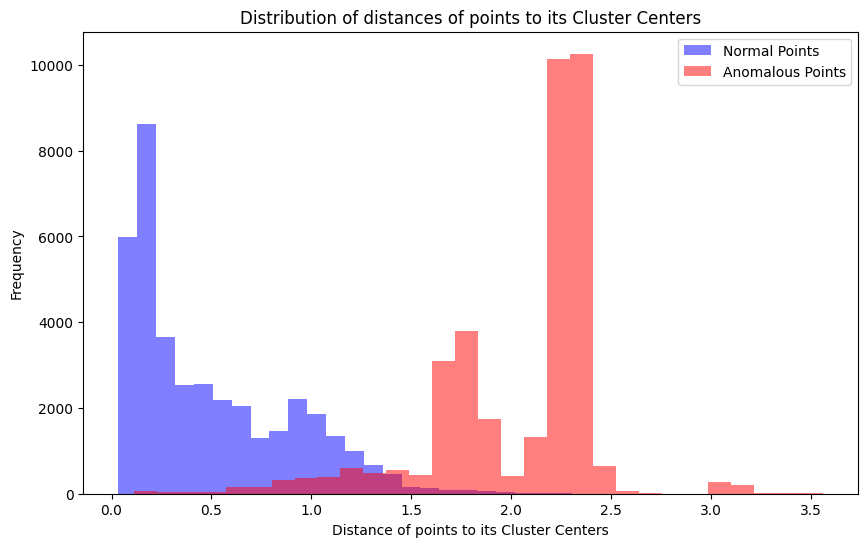

In [534]:
import matplotlib.pyplot as plt

# Define colors for normal and anomalous points
normal_color = 'blue'
anomalous_color = 'red'

plt.figure(figsize=(10, 6))
plt.hist(normal_distances, bins=30, alpha=0.5, color=normal_color, label='Normal Points')
plt.hist(anomalous_distances, bins=30, alpha=0.5, color=anomalous_color, label='Anomalous Points')
plt.xlabel('Distance of points to its Cluster Centers')
plt.ylabel('Frequency')
plt.title('Distribution of distances of points to its Cluster Centers')
plt.legend()
plt.show()


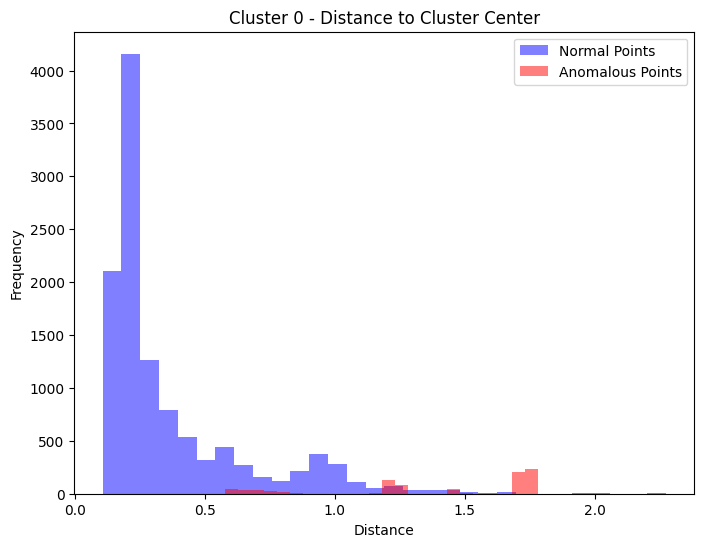

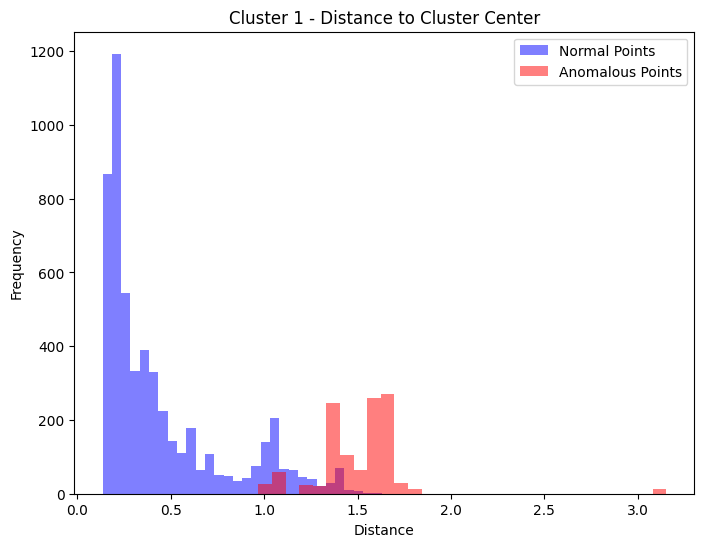

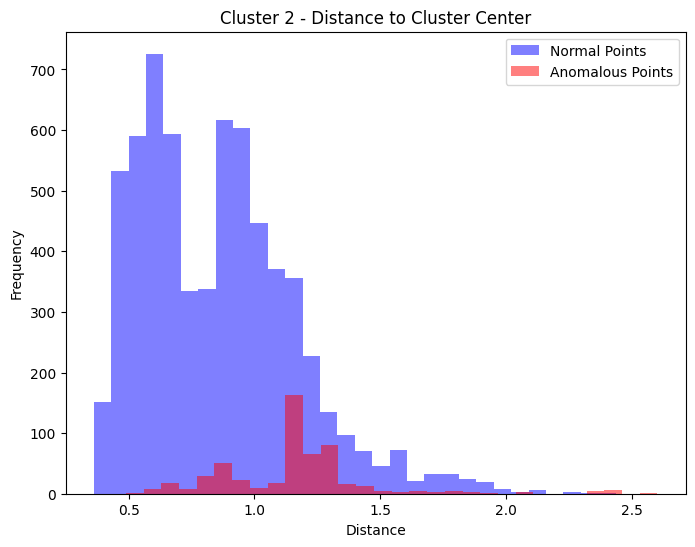

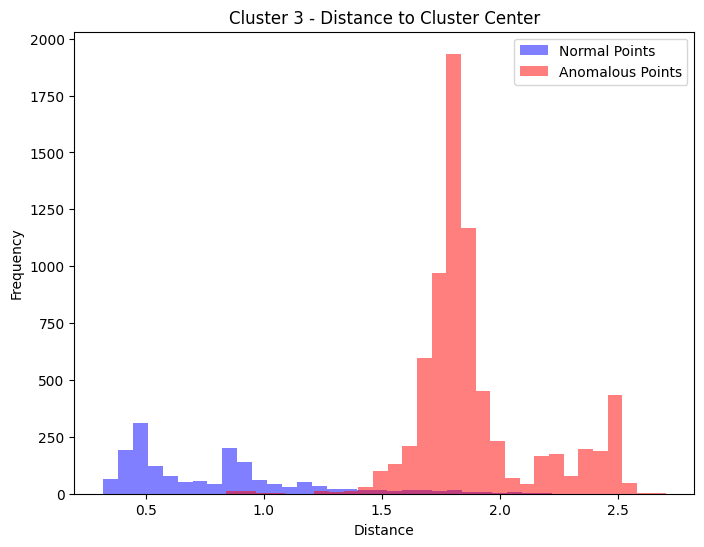

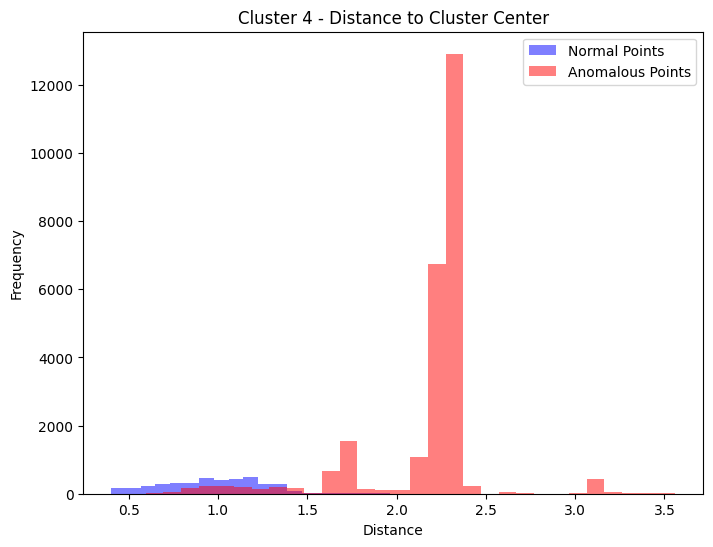

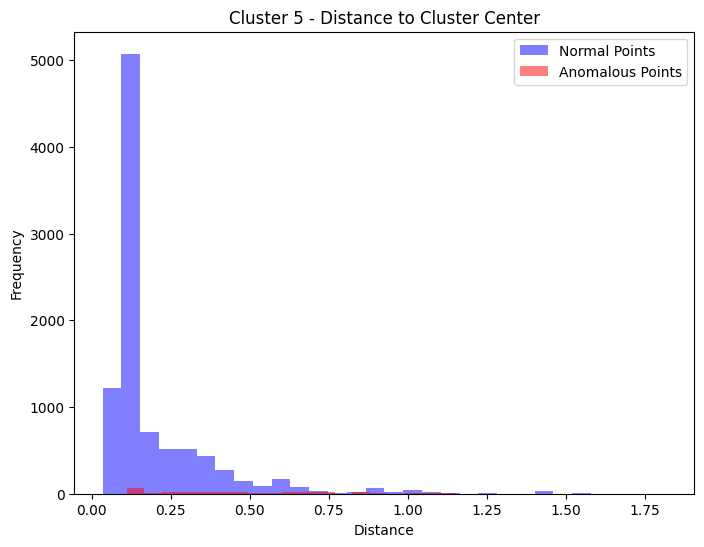

In [535]:
for i in range(6):
    plt.figure(figsize=(8, 6))
    plt.hist(cluster_distances_normal_list[i], bins=30, color='blue', alpha=0.5, label='Normal Points')
    plt.hist(cluster_distances_anomalous_list[i], bins=30, color='red', alpha=0.5, label='Anomalous Points')
    plt.title(f'Cluster {i} - Distance to Cluster Center')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [536]:
import numpy as np

best_thresholds = {}


for i in range(6):

    normal_distances = np.sort(cluster_distances_normal_list[i])
    anomalous_distances = np.sort(cluster_distances_anomalous_list[i])


    best_threshold = 0
    best_accuracy = 0
    for threshold in np.linspace(0, max(normal_distances.max(), anomalous_distances.max()), 100):

        num_anomalous_above_threshold = np.sum(anomalous_distances > threshold)

        num_normal_below_threshold = np.sum(normal_distances <= threshold)

        num_normal_above_threshold = np.sum(normal_distances > threshold)

        num_anomalous_below_threshold = np.sum(anomalous_distances <= threshold)


        accuracy = (num_anomalous_above_threshold + num_normal_below_threshold) / (num_anomalous_above_threshold + num_normal_below_threshold + num_normal_above_threshold + num_anomalous_below_threshold)


        if accuracy > best_accuracy:
            best_threshold = threshold
            best_accuracy = accuracy




    best_thresholds[i] = [best_threshold,best_accuracy]

sum=0

for i, threshold in best_thresholds.items():
    print(f"Cluster {i}: Best Threshold = {threshold[0]}  Best accuracy = {threshold[1]}")
    sum+=threshold[1]
print(f"accuracy = {sum/6}")

Cluster 0: Best Threshold = 1.1717113292578496  Best accuracy = 0.9654808317089019
Cluster 1: Best Threshold = 1.337789145382968  Best accuracy = 0.9626808834729627
Cluster 2: Best Threshold = 2.339965829945574  Best accuracy = 0.9237360754070265
Cluster 3: Best Threshold = 1.3928300467404453  Best accuracy = 0.9787114845938375
Cluster 4: Best Threshold = 1.365958733992143  Best accuracy = 0.952626610020905
Cluster 5: Best Threshold = 1.6333055303554342  Best accuracy = 0.9698856676194365
accuracy = 0.9588535921371785


In [537]:
import numpy as np

# Assuming you have 6 different distance thresholds for each cluster
# cluster_thresholds = [1.38, 1.1, 0.3, 1.3, 1.1, 0.882]

# cluster_thresholds = [1.3652401644774157, 1.4431604736983172, 1.4708333304434111, 1.3952503710082083, 2.236025815058236, 1.3378374937808875]
cluster_thresholds = [best_thresholds[0][0],best_thresholds[1][0],best_thresholds[2][0],best_thresholds[3][0],best_thresholds[4][0],best_thresholds[5][0]]


TP_list = []
TN_list = []
FP_list = []
FN_list = []
accuracy_list = []


for i in range(6):
    TP = np.sum(np.array(cluster_distances_anomalous_list[i]) > cluster_thresholds[i])
    TN = np.sum(np.array(cluster_distances_normal_list[i]) <= cluster_thresholds[i])
    FP = np.sum(np.array(cluster_distances_normal_list[i]) > cluster_thresholds[i])
    FN = np.sum(np.array(cluster_distances_anomalous_list[i]) <= cluster_thresholds[i])

    accuracy = (TP + TN) / (TP + TN + FP + FN)


    TP_list.append(TP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)
    accuracy_list.append(accuracy)


    print(f"Cluster {i}:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"Accuracy: {accuracy}\n")


overall_accuracy = np.mean(accuracy_list)
print(f"Overall Accuracy: {overall_accuracy}")


Cluster 0:
True Positives (TP): 706
True Negatives (TN): 11181
False Positives (FP): 254
False Negatives (FN): 171
Accuracy: 0.9654808317089019

Cluster 1:
True Positives (TP): 997
True Negatives (TN): 5323
False Positives (FP): 114
False Negatives (FN): 131
Accuracy: 0.9626808834729627

Cluster 2:
True Positives (TP): 11
True Negatives (TN): 6457
False Positives (FP): 2
False Negatives (FN): 532
Accuracy: 0.9237360754070265

Cluster 3:
True Positives (TP): 7223
True Negatives (TN): 1512
False Positives (FP): 138
False Negatives (FN): 52
Accuracy: 0.9787114845938375

Cluster 4:
True Positives (TP): 24437
True Negatives (TN): 3816
False Positives (FP): 229
False Negatives (FN): 1176
Accuracy: 0.952626610020905

Cluster 5:
True Positives (TP): 2
True Negatives (TN): 9499
False Positives (FP): 2
False Negatives (FN): 293
Accuracy: 0.9698856676194365

Overall Accuracy: 0.9588535921371785


In [538]:
normal_test_cluster_labels = kmeans_01.predict(dist_normal_test)
anomalous_test_cluster_labels = kmeans_01.predict(dist_anomalous_test)

normal_test_distances = pairwise_distances(dist_normal_test, cluster_centers, metric='euclidean')
anomalous_test_distances = pairwise_distances(dist_anomalous_test, cluster_centers, metric='euclidean')

In [539]:
cluster_points_normal_test_arr = []
for i in range(6):
    cluster_points_normal_test_arr.append(dist_normal_test[normal_test_cluster_labels == i])

from sklearn.metrics import pairwise_distances

normal_distances = []
cluster_distances_normal_test_arr = []
for i in range(6):
    cluster_center = kmeans_01.cluster_centers_[i]
    cluster_points = cluster_points_normal_test_arr[i]
    distances = pairwise_distances(cluster_points, [cluster_center])
    cluster_distances_normal_test_arr.append(distances)
    normal_distances.extend(distances)

In [540]:
cluster_points_anomalous_test_arr = []
cluster_pred = kmeans_01.predict(dist_anomalous_test)
cluster_points_anomalous_test_arr = []
for i in range(6):
  cluster_points_anomalous_test_arr.append(dist_anomalous_test[anomalous_test_cluster_labels == i ])


from sklearn.metrics import pairwise_distances

anomalous_distances = []
cluster_distances_anomalous_test_arr = []
for i in range(6):
  cluster_center = kmeans_01.cluster_centers_[i]
  cluster_points = cluster_points_anomalous_test_arr[i]
  distances = pairwise_distances(cluster_points, [cluster_center])
  cluster_distances_anomalous_test_arr.append(distances)
  anomalous_distances.extend(distances)

In [541]:
normal_distances = [item[0] for item in normal_distances]
anomalous_distances = [item[0] for item in anomalous_distances]

In [542]:
cluster_distances_normal_test_list = [[float(item[0]) for item in arr] for arr in cluster_distances_normal_test_arr]
cluster_distances_anomalous_test_list = [[float(item[0]) for item in arr] for arr in cluster_distances_anomalous_test_arr]

In [543]:
import numpy as np

# Assuming you have 6 different distance thresholds for each cluster
# cluster_thresholds = [1.38, 1.1, 0.3, 1.3, 1.1, 0.882]

# cluster_thresholds = [1.3652401644774157, 1.4431604736983172, 1.4708333304434111, 1.3952503710082083, 2.236025815058236, 1.3378374937808875]
cluster_thresholds = [best_thresholds[0][0],best_thresholds[1][0],best_thresholds[2][0],best_thresholds[3][0],best_thresholds[4][0],best_thresholds[5][0]]


TP_list = []
TN_list = []
FP_list = []
FN_list = []
accuracy_list = []
tp=0
tn=0
fp=0
fn=0

for i in range(6):
    TP = np.sum(np.array(cluster_distances_anomalous_test_list[i]) > cluster_thresholds[i])
    TN = np.sum(np.array(cluster_distances_normal_test_list[i]) <= cluster_thresholds[i])
    FP = np.sum(np.array(cluster_distances_normal_test_list[i]) > cluster_thresholds[i])
    FN = np.sum(np.array(cluster_distances_anomalous_test_list[i]) <= cluster_thresholds[i])
    tp+=TP
    tn+=TN
    fp+=FP
    fn+=FN
    accuracy = (TP + TN) / (TP + TN + FP + FN)


    TP_list.append(TP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)
    accuracy_list.append(accuracy)


    print(f"Cluster {i}:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"Accuracy: {accuracy}\n")


print((tp + tn) / (tp + tn + fp + fn))

overall_accuracy = np.mean(accuracy_list)
print(f"Overall Accuracy: {overall_accuracy}")


Cluster 0:
True Positives (TP): 466
True Negatives (TN): 12015
False Positives (FP): 237
False Negatives (FN): 109
Accuracy: 0.973025649021595

Cluster 1:
True Positives (TP): 1548
True Negatives (TN): 5085
False Positives (FP): 431
False Negatives (FN): 1019
Accuracy: 0.8206111592230607

Cluster 2:
True Positives (TP): 5
True Negatives (TN): 5472
False Positives (FP): 2
False Negatives (FN): 1308
Accuracy: 0.8069839398850744

Cluster 3:
True Positives (TP): 9487
True Negatives (TN): 1181
False Positives (FP): 162
False Negatives (FN): 212
Accuracy: 0.966129324397754

Cluster 4:
True Positives (TP): 18336
True Negatives (TN): 3464
False Positives (FP): 283
False Negatives (FN): 1767
Accuracy: 0.9140461215932913

Cluster 5:
True Positives (TP): 1
True Negatives (TN): 10193
False Positives (FP): 2
False Negatives (FN): 1474
Accuracy: 0.8735218508997429

0.905654533457224
Overall Accuracy: 0.8923863408367532


In [544]:
import numpy as np

TP = tp
TN = tn
FP = fp
FN = fn
y_true_art = np.concatenate([np.ones(TP + FN), np.zeros(TN + FP)])
y_pred_art = np.concatenate([np.ones(TP), np.zeros(FN), np.zeros(TN), np.ones(FP)])


from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_true_art, y_pred_art)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_true_art, y_pred_art)
print("Classification Report:")
print(report)

Confusion Matrix:
[[37410  1117]
 [ 5889 29843]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     38527
         1.0       0.96      0.84      0.89     35732

    accuracy                           0.91     74259
   macro avg       0.91      0.90      0.90     74259
weighted avg       0.91      0.91      0.91     74259

